# Imports

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Exploration

## Gender

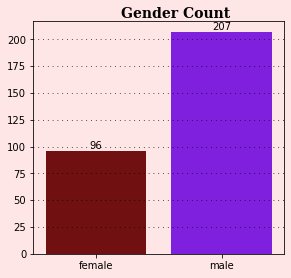

In [3]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax1 = fig.add_subplot(gs[0,1])


background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff"]
fig.patch.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 


# Sex count
        
ax1.text(0.2, 220, 'Gender Count', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_xticklabels(['female', 'male'])
ax1.set_ylabel("")
for i in ax1.containers:
    ax1.bar_label(i,)


## Age

<Figure size 720x720 with 0 Axes>

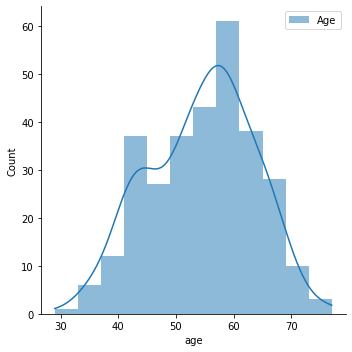

In [31]:
plt.figure(figsize=(10,10))
sns.displot(df.age, label="Age", kde= True, linewidth = 0)
sns.color_palette("pastel")
plt.legend()

## Output

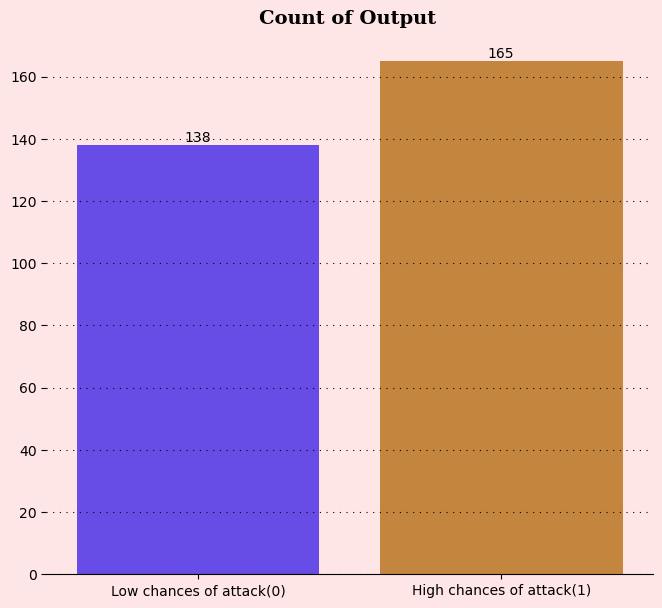

In [26]:

fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax1 = fig.add_subplot(gs[0,1])

background_color = "#ffe6e6"
color_palette = ["#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Target Count
ax1.text(0.20,177,"Count of Output",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'output',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])

ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)
for i in ax1.containers:
    ax1.bar_label(i,)


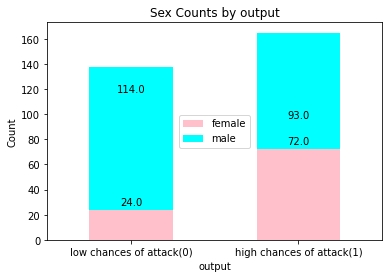

In [30]:
xs = [0, 1]
labels = ['low chances of attack(0)', 'high chances of attack(1)']
# Create a pivot table with the counts of male and female patients for each target value
counts = df.pivot_table(index='output', columns='sex', aggfunc='size')

# Create the stacked bar chart
counts.plot(kind='bar', stacked=True, color = ['pink', 'cyan'], label = ['female', 'male'])
plt.xlabel('output')
plt.ylabel('Count')
plt.title('Sex Counts by output')

#create names on the x axis 
plt.xticks(xs, labels, rotation = 'horizontal')
plt.legend(['female','male'], loc = 'center')

# Loop through the bars in the plot
for i, bar in enumerate(plt.gca().patches):
    # Get the height of each bar
    height = bar.get_height()
    
    # Use the annotate() function to label the height of each bar
    plt.gca().annotate('{}'.format(height),
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0,3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom')

    
#show graph
plt.show()



C:\Users\ewang5\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ewang5\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


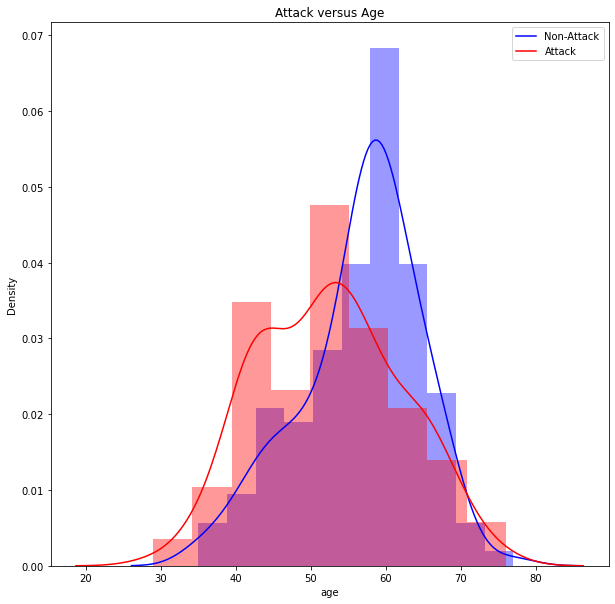

In [21]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['output'] == 0]["age"], color='blue',kde=True,) 
sns.distplot(df[df['output'] == 1]["age"], color='red',kde=True)
plt.title('Attack versus Age')

#add a legend to the plot 
plt.legend(['Non-Attack', 'Attack'], loc = 'upper right')
plt.show()

C:\Users\ewang5\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ewang5\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


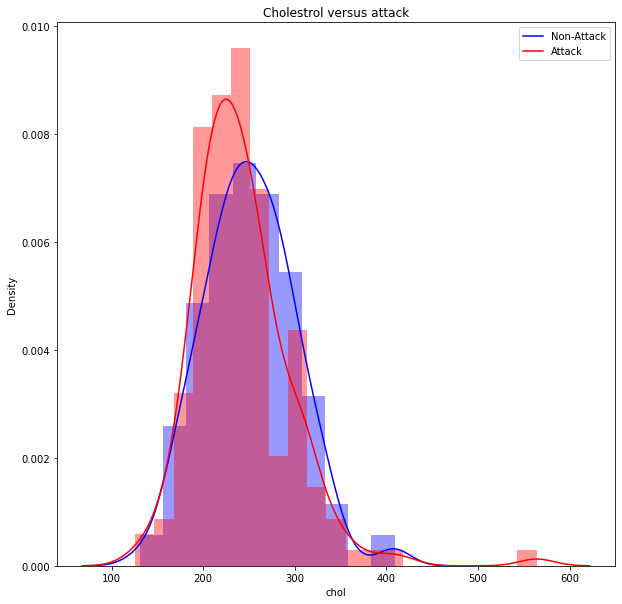

In [34]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['output'] == 0]["chol"], color='blue',kde=True,) 
sns.distplot(df[df['output'] == 1]["chol"], color='red',kde=True)
plt.title('Cholestrol versus attack')
#add a legend to the plot 
plt.legend(['Non-Attack', 'Attack'], loc = 'upper right')
plt.show()

C:\Users\ewang5\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ewang5\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


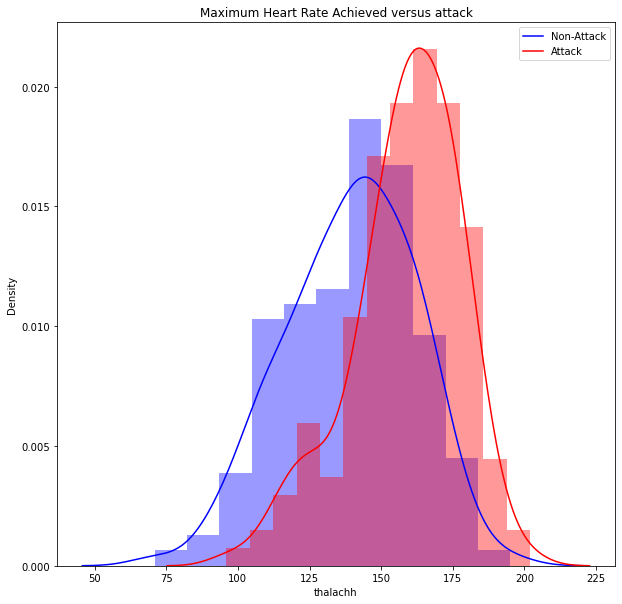

In [33]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['output'] == 0]["thalachh"], color='blue',kde=True,) 
sns.distplot(df[df['output'] == 1]["thalachh"], color='red',kde=True)
plt.title('Maximum Heart Rate Achieved versus attack')
#add a legend to the plot 
plt.legend(['Non-Attack', 'Attack'], loc = 'upper right')
plt.show()

## Train Test Split 

In [35]:
X = df.drop('output', axis = 1)
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [36]:
X.shape

(303, 13)

In [37]:
y = df['output']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [38]:
y.shape

(303,)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [40]:
print ("X_train: ", X_train.shape)
print ("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test ", y_test.shape)

X_train:  (242, 13)
y_train:  (242,)
X_test:  (61, 13)
y_test  (61,)


# Feature Selection

In [18]:
# Use univariate logistic regression for feature screening 

# Define the features and target
features = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
X = df[features]
y = df['output']


# Train the model using a loop to iterate over each feature
scores = []
for feature in features:
    model = LogisticRegression()
    model.fit(X_train[[feature]], y_train)
    scores.append(model.score(X_test[[feature]], y_test))

# Print the scores for each feature
print(scores)


[0.6885245901639344, 0.5245901639344263, 0.7868852459016393, 0.5737704918032787, 0.5737704918032787, 0.5081967213114754, 0.5573770491803278, 0.7377049180327869, 0.7213114754098361, 0.7049180327868853, 0.7704918032786885, 0.6885245901639344, 0.7704918032786885]


# ZeroR

In [11]:
# Import the necessary modules
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# Create a dummy classifier
zero_r = DummyClassifier(strategy="most_frequent")

# Fit the classifier on the training data
zero_r.fit(X_train, y_train)

# Evaluate the classifier on the test data
print(zero_r.score(X_test, y_test))


0.5573770491803278


# Logistic Regression

In [78]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Create the parameter grid
param_grid = {'C': [0.1, 1, 10],
              'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'penalty': ['l2', 'l1']}

# Instantiate the grid search model
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(grid_search.best_params_)
print(grid_search.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
0.8186224489795919


C:\Users\ewang5\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ewang5\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ewang5\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ewang5\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
V

In [81]:
logreg = LogisticRegression(C= 1, penalty = 'l2', solver = 'liblinear')

logreg.fit(X_train,y_train)
print("Logistic Regression Accuracy :",logreg.score(X_test,y_test))

Logistic Regression Accuracy : 0.8524590163934426


In [85]:
logreg = LogisticRegression(C= 1, penalty = 'l2', solver = 'liblinear')

k = 10
scores = cross_val_score(logreg, X_train, y_train, cv = k)

print("Logistic Regression Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Logistic Regression Accuracy: 0.82 (+/- 0.13)


In [86]:
logreg = LogisticRegression(C= 1, penalty = 'l2', solver = 'liblinear')

logreg.fit(X_train,y_train)

#prediction probabilities 
prob = [0 for _ in range(len(y_test))]
lr_probs = logreg.predict_proba(X_test)

#keep postive outcomes 
lr_probs = lr_probs[:, 1]

#calculate AUROC
lr_auc = roc_auc_score(y_test, lr_probs)
print('Logistic Regression AUC: ', lr_auc)

Logistic Regression AUC:  0.9084967320261438


# SVM

In [43]:
from sklearn.svm import SVC

# Finding the best parameters
grid = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}
svm0 = SVC(random_state=42)
svm_cv = GridSearchCV(svm0, grid, cv=10)
svm_cv.fit(X,y)
print("Best parameters of SVC :",svm_cv.best_params_)

Best parameters of SVC : {'C': 7, 'gamma': 0.0005}


In [44]:
svm = SVC(C=svm_cv.best_params_["C"], gamma=svm_cv.best_params_["gamma"],random_state=42)
svm.fit(X_train,y_train)
print("SVC Accuracy :",svm.score(X_test,y_test))

SVC Accuracy : 0.7213114754098361


In [49]:
svm = SVC(C=svm_cv.best_params_["C"], gamma=svm_cv.best_params_["gamma"],random_state=42)

k = 10
scores = cross_val_score(svm, X_train, y_train, cv = k)

print("SVM Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

SVM Accuracy: 0.67 (+/- 0.16)


In [50]:
#fit model
svm.fit(X_train, y_train)

#make predictions 
predictions = svm.predict(X_test)


#calculate the AUC score 
auc = roc_auc_score(y_test, predictions)
print('AUC: %0.2f' % auc)

AUC: 0.72


## Random Forest

In [54]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the parameter grid
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 15]}

# Instantiate the grid search model
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'max_depth': 5, 'n_estimators': 200}
0.8432823129251702


In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 200, max_depth= 5)
rf.fit(X_train, y_train)
print("Random Forest Classifier Accuracy :",rf.score(X_test,y_test))


Random Forest Classifier Accuracy : 0.8852459016393442


In [68]:
rf = RandomForestClassifier(n_estimators= 200, max_depth= 5)

k = 10
scores = cross_val_score(rf, X_train, y_train, cv = k)

print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Random Forest Accuracy: 0.84 (+/- 0.09)


In [62]:
#prediction probabilities 
rf = RandomForestClassifier(n_estimators= 200, max_depth= 5)
rf.fit(X_train, y_train)
prob = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)

#keep postive outcomes 
rf_probs = rf_probs[:, 1]

#calculate AUROC
rf_auc = roc_auc_score(y_test, rf_probs)
print('Random Forest AUC: ', rf_auc)

Random Forest AUC:  0.9444444444444444


## Decision Trees

In [70]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create the parameter grid
param_grid = {'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10]}

# Instantiate the grid search model
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(grid_search.best_params_)
print(grid_search.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'max_depth': 5, 'min_samples_split': 2}
0.768877551020408


In [74]:
tree = DecisionTreeClassifier(max_depth= 5, min_samples_split = 2)
tree.fit(X_train, y_train)
print("Decision Tree Classifier Accuracy :",tree.score(X_test,y_test))

Decision Tree Classifier Accuracy : 0.7868852459016393


In [93]:
tree = DecisionTreeClassifier(max_depth= 5, min_samples_split = 2)
tree.fit(X_train, y_train)
k = 10
scores = cross_val_score(tree, X_train, y_train, cv = k)

print("Decision Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Decision Accuracy: 0.81 (+/- 0.14)


In [75]:
#prediction probabilities 
prob = [0 for _ in range(len(y_test))]
tree_probs = tree.predict_proba(X_test)

#keep postive outcomes 
tree_probs = tree_probs[:, 1]

#calculate AUROC
tree_auc = roc_auc_score(y_test, tree_probs)
print('Decision Tree AUC: ', tree_auc)

Decision Tree AUC:  0.8366013071895425


## K-Nearest Neighbors

In [63]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Create the parameter grid
param_grid = {'n_neighbors': [5, 10, 15],
              'weights': ['uniform', 'distance']}

# Instantiate the grid search model
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(grid_search.best_params_)
print(grid_search.best_score_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'n_neighbors': 10, 'weights': 'distance'}
0.6738945578231292


In [66]:
knn = KNeighborsClassifier(n_neighbors = 10, weights = 'distance')
knn.fit(X_train,y_train)
print("KNN Accuracy :",knn.score(X_test,y_test))

KNN Accuracy : 0.6557377049180327


In [69]:
knn = KNeighborsClassifier(n_neighbors = 10, weights = 'distance')

k = 10
scores = cross_val_score(knn, X_train, y_train, cv = k)

print("KNN Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

KNN Accuracy: 0.65 (+/- 0.22)


In [31]:
#prediction probabilities 
prob = [0 for _ in range(len(y_test))]
knn_probs = knn.predict_proba(X_test)

#keep postive outcomes 
knn_probs = knn_probs[:, 1]

#calculate AUROC
knn_auc = roc_auc_score(y_test, knn_probs)
print('Decision Tree AUC: ', knn_auc)

Decision Tree AUC:  0.7347494553376906


## Classification Reports and Confusion Matrix

In [125]:
clf=RandomForestClassifier(n_estimators= 200, max_depth= 5)
clf.fit(X_train,y_train)
y_pred_RF=clf.predict_proba(X_test)[:,1]
y_pred_RF_binary = clf.predict(X_test)

print("Classification only by Random Forest")
print(confusion_matrix(y_test,y_pred_RF_binary))
print(classification_report(y_test, y_pred_RF_binary))

Classification only by Random Forest
[[22  5]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [96]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

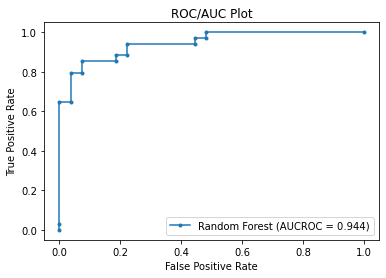

In [97]:
plt.plot(rf_fpr, rf_tpr, marker = '.', label = 'Random Forest (AUCROC = %0.3f)' % rf_auc)

#title 
plt.title('ROC/AUC Plot')
#Axis Label 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#Show Legend 
plt.legend()
#Show plot 
plt.show()

# More Insights on Random Forest

using only features that you usually obtain from a routine checkup

In [103]:
df1 = pd.read_csv('heart_feature_selection.csv')
df1.head()

,age,sex,trtbps,chol,fbs,thalachh,output
0,63,1,145,233,1,150,1
1,37,1,130,250,0,187,1
2,41,0,130,204,0,172,1
3,56,1,120,236,0,178,1
4,57,0,120,354,0,163,1


In [105]:
X1 = df.drop('output', axis = 1)
X1.head()

,age,sex,trtbps,chol,fbs,thalachh
0,63,1,145,233,1,150
1,37,1,130,250,0,187
2,41,0,130,204,0,172
3,56,1,120,236,0,178
4,57,0,120,354,0,163


In [106]:
y1 =df['output']
y1.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [107]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [126]:
rf1 = RandomForestClassifier(n_estimators= 200, max_depth= 5)

k = 10
scores = cross_val_score(rf1, X1_train, y1_train, cv = k)

print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Random Forest Accuracy: 0.74 (+/- 0.20)


In [128]:
#prediction probabilities 
rf1 = RandomForestClassifier(n_estimators= 200, max_depth= 5)
rf1.fit(X1_train, y1_train)
prob = [0 for _ in range(len(y1_test))]
rf1_probs = rf.predict_proba(X1_test)

#keep postive outcomes 
rf1_probs = rf1_probs[:, 1]

#calculate AUROC
rf1_auc = roc_auc_score(y1_test, rf1_probs)
print('Random Forest AUC: ', rf1_auc)

Random Forest AUC:  0.8300653594771241


In [129]:
clf=RandomForestClassifier(n_estimators= 200, max_depth= 5)
clf.fit(X1_train,y1_train)
y_pred_RF=clf.predict_proba(X1_test)[:,1]
y_pred_RF_binary = clf.predict(X1_test)

print("Classification only by Random Forest")
print(confusion_matrix(y1_test,y_pred_RF_binary))
print(classification_report(y1_test, y_pred_RF_binary))

Classification only by Random Forest
[[21  6]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.82      0.79      0.81        34

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [130]:
rf_fpr, rf_tpr, _ = roc_curve(y1_test, rf1_probs)

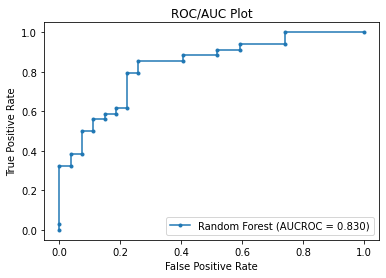

In [131]:
plt.plot(rf_fpr, rf_tpr, marker = '.', label = 'Random Forest (AUCROC = %0.3f)' % rf_auc)

#title 
plt.title('ROC/AUC Plot')
#Axis Label 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#Show Legend 
plt.legend()
#Show plot 
plt.show()